In [1]:
import os
#os.chdir('/Users/rupesh.karn/Desktop/WorkPart-1/UNSW-NB15 Dataset')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

In [2]:
#Type-1
print("Reading Training csv file.")
df1 = pd.read_csv("KDDTrain+.txt")
print("Reading Testing csv file.")
df2 = pd.read_csv("KDDTest+.txt")
df1.drop(df1.columns[-1], axis=1, inplace=True)  
df2.drop(df2.columns[-1], axis=1, inplace=True)  
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])

df1.columns = col_names
df2.columns = col_names

df = pd.concat([df1, df2])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['labels'])
df['labels'] = le.transform(df['labels'])

le = preprocessing.LabelEncoder()
le.fit(df['protocol_type'])
df['protocol_type'] = le.transform(df['protocol_type'])

le = preprocessing.LabelEncoder()
le.fit(df['service'])
df['service'] = le.transform(df['service'])

le = preprocessing.LabelEncoder()
le.fit(df['flag'])
df['flag'] = le.transform(df['flag'])

X= df.values[:,:-1]
Y = df.values[:,-1]
Y = Y.astype(int)
print (X.shape,Y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y, test_size=0.33)
print (X_train.shape,X_test.shape)

Reading Training csv file.
Reading Testing csv file.
(148515, 41) (148515,)
(99505, 41) (49010, 41)


In [2]:
#Type-2
print("Reading Training csv file.")
df1 = pd.read_csv("KDDTrain+.txt")
print("Reading Testing csv file.")
df2 = pd.read_csv("KDDTest+.txt")
df1.drop(df1.columns[-2], axis=1, inplace=True)  
df2.drop(df2.columns[-2], axis=1, inplace=True)  
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])

df1.columns = col_names
df2.columns = col_names

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1['protocol_type'])
df1['protocol_type'] = le.transform(df1['protocol_type'])
df2['protocol_type'] = le.transform(df2['protocol_type'])
le = preprocessing.LabelEncoder()
le.fit(df1['service'])
df1['service'] = le.transform(df1['service'])
df2['service'] = le.transform(df2['service'])
le = preprocessing.LabelEncoder()
le.fit(df1['flag'])
df1['flag'] = le.transform(df1['flag'])
df2['flag'] = le.transform(df2['flag'])

     

X_train= df1.values[:,:-1]
X_test= df2.values[:,:-1]
Y_train_all_attacks = df1.values[:,-1]
Y_test_all_attacks = df2.values[:,-1]
Y_train_all_attacks = Y_train_all_attacks.astype(int)
Y_test_all_attacks = Y_test_all_attacks.astype(int)
print (X_train.shape,X_test.shape,Y_train_all_attacks.shape,Y_test_all_attacks.shape)

Reading Training csv file.
Reading Testing csv file.
(125972, 41) (22543, 41) (125972,) (22543,)


In [4]:
#Type-1 is used here
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
# Data params
input_dim = 41
output_dim = 22

# Network params
n_hidden_units = 41
activation_fn = tf.nn.relu

# Optimization params
batch_size = 64
epochs_per_task = 10

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [26]:
from keras.utils import np_utils

#task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,17],[18,19],[20,21],[22,23],[24,25],[26,27],[28,29],[30,31],[32,33],[34,35],[36,37],[38,39]]
#nb_classes  = 40
#task_labels = [[0,5],[2,3],[1,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,17],[18,19],[20,21]]
nb_classes  = 22
task_labels = [[8,9], [6,7], [4,5], [2,3], [0,1],[10,11],[12,13],[14,15],[16,17]]
#task_labels = [[2,3], [4,5], [6,7], [8,9],[10,11]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
#task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9],[1,5],[0,9],[3,8],[0,6],[4,2],[3,5],[0,4],[9,6],[1,2]]
n_tasks = len(task_labels)
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)

In [27]:
for i in range(n_tasks):
    print('Task:',i,training_datasets[i][0].shape,training_datasets[i][1].shape,validation_datasets[i][0].shape,validation_datasets[i][1].shape)

Task: 0 (22, 41) (22, 22) (14, 41) (14, 22)
Task: 1 (2561, 41) (2561, 22) (1191, 41) (1191, 22)
Task: 2 (957, 41) (957, 22) (460, 41) (460, 22)
Task: 3 (44, 41) (44, 22) (17, 41) (17, 22)
Task: 4 (1359, 41) (1359, 22) (693, 41) (693, 22)
Task: 5 (888, 41) (888, 22) (401, 41) (401, 22)
Task: 6 (31, 41) (31, 22) (11, 41) (11, 22)
Task: 7 (31720, 41) (31720, 22) (15716, 41) (15716, 22)
Task: 8 (51700, 41) (51700, 22) (25358, 41) (25358, 22)


In [28]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
import keras.backend as K
import keras.activations as activations

output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

def masked_softmax(logits):
    # logits are [batch_size, output_dim]
    x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), logits, -1e32 * tf.ones_like(logits))
    return activations.softmax(x)

def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    #print(sess.run(output_mask))
    
def masked_predict(model, data, targets):
    pred = model.predict(data)
    #print(pred)
    acc = np.argmax(pred,1)==np.argmax(targets,1)
    return acc.mean()

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn, input_shape=(input_dim,)))
#model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn))
model.add(Dense(30, activation=activation_fn))
model.add(Dense(output_dim, kernel_initializer='zero', activation=masked_softmax))
#model.add(Dense(output_dim, kernel_initializer='random_uniform', activation=masked_softmax, input_shape=(input_dim,)))

from pathint import protocols
from pathint.optimizers import KOOptimizer
from keras.optimizers import Adam, RMSprop,SGD
from keras.callbacks import Callback
from pathint.keras_utils import LossHistory
from keras.callbacks import History 
from keras.callbacks import LambdaCallback

#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
#opt = SGD(1e-3)
#opt = RMSprop(lr=1e-3)
oopt = KOOptimizer(opt, model=model, **protocol)
model.compile(loss='categorical_crossentropy', optimizer=oopt, metrics=['accuracy'])
model.model._make_train_function()
saved_weights = model.get_weights()

save_weights_epoch=[]
save_loss_epoch=[]
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_weights_epoch.append(model.get_weights()))
history = LossHistory()
#history = History()
callbacks = [history]
datafile_name = "split_mnist_data_%s.pkl.gz"%protocol_name

In [51]:
print(protocol)

{'regularizer_fn': <function quadratic_regularizer at 0x7f3673fc5e18>, 'init_updates': [('cweights', <function <lambda>.<locals>.<lambda> at 0x7f3648686ae8>)], 'task_updates': [('omega', <function <lambda>.<locals>.<lambda> at 0x7f364868b6a8>), ('cweights', <function <lambda>.<locals>.<lambda> at 0x7f364879b6a8>), ('grads2', <function <lambda>.<locals>.<lambda> at 0x7f364879b488>)], 'step_updates': [('grads2', <function <lambda>.<locals>.<lambda> at 0x7f364868bb70>)]}


In [31]:
def run_fits(cvals, training_data, valid_data, eval_on_train_set=False, nstats=1):
    acc_mean = dict()
    acc_std = dict()
    model_weights_save = []   #Empty list to save the model weights aftertraining each task
    imp_par = dict()  #Empty list to save importance parameter after learning each progressive task
    for cidx, cval_ in enumerate(tqdm(cvals)):
        runs = []
        for runid in range(nstats):
            sess.run(tf.global_variables_initializer())
            # model.set_weights(saved_weights)
            cstuffs = []
            evals = []
            print("setting cval")
            cval = cval_
            oopt.set_strength(cval)
            oopt.init_task_vars()
            print("cval is", sess.run(oopt.lam))
            for age, tidx in enumerate(range(n_tasks)):
                print("Age %i, cval is=%f"%(age,cval))
                print("settint output mask")
                set_active_outputs(task_labels[age])
                stuffs = model.fit(training_data[tidx][0], training_data[tidx][1], batch_size, epochs_per_task, callbacks=[print_weights])
                save_loss_epoch.append(stuffs.history['loss'])
                oopt.update_task_metrics(training_data[tidx][0], training_data[tidx][1], batch_size)
                oopt.update_task_vars()
                ftask = []
                model_weights_save.append(model.get_weights()) #Save the model weights aftertraining each task
                for j in range(n_tasks):
                    set_active_outputs(task_labels[j])
                    if eval_on_train_set:
                        f_ = masked_predict(model, training_data[j][0], training_data[j][1])
                    else:
                        f_ = masked_predict(model, valid_data[j][0], valid_data[j][1])
                    ftask.append(np.mean(f_))
                evals.append(ftask)
                cstuffs.append(stuffs)

                # Re-initialize optimizater variables
                if reset_optimizer:
                    oopt.reset_optimizer()

            evals = np.array(evals)
            runs.append(evals)
        
        runs = np.array(runs)
        acc_mean[cval_] = runs.mean(0)
        acc_std[cval_] = runs.std(0)
    return dict(mean=acc_mean, std=acc_std),model_weights_save, imp_par

In [32]:
# cvals = np.concatenate(([0], np.logspace(-2, 2, 10)))
# cvals = np.concatenate(([0], np.logspace(-1, 2, 2)))
# cvals = np.concatenate(([0], np.logspace(-2, 0, 3)))
#cvals = np.logspace(-3, 3, 7)#[0, 1.0, 2, 5, 10]
cvals = [1.0]
print(cvals)

[1.0]


In [33]:
#%%capture

recompute_data = True

if recompute_data:
    data,model_weights_save,imp_par = run_fits(cvals, training_datasets, validation_datasets, eval_on_train_set=False, nstats=n_stats)
    utils.save_zipped_pickle(data, datafile_name)

  0%|          | 0/1 [00:00<?, ?it/s]

setting cval
cval is 1.0
Age 0, cval is=1.000000
settint output mask
Epoch 1/10
22/22 [==============================] - 0s - loss: 0.6931 - acc: 0.6364
Epoch 2/10
22/22 [==============================] - 0s - loss: 0.5398 - acc: 0.4545
Epoch 3/10
22/22 [==============================] - 0s - loss: 0.4975 - acc: 0.5455
Epoch 4/10
22/22 [==============================] - 0s - loss: 0.4741 - acc: 0.9091
Epoch 5/10
22/22 [==============================] - 0s - loss: 0.4592 - acc: 0.9545
Epoch 6/10
22/22 [==============================] - 0s - loss: 0.4484 - acc: 0.9545
Epoch 7/10
22/22 [==============================] - 0s - loss: 0.4396 - acc: 1.0000
Epoch 8/10
22/22 [==============================] - 0s - loss: 0.4314 - acc: 1.0000
Epoch 9/10
22/22 [==============================] - 0s - loss: 0.4230 - acc: 1.0000
Epoch 10/10
22/22 [==============================] - 0s - loss: 0.4141 - acc: 1.0000
Age 1, cval is=1.000000
settint output mask
Epoch 1/10
2561/2561 [========================

100%|██████████| 1/1 [00:34<00:00, 34.83s/it]


In [54]:
import h5py
print(model.summary())
model.save_weights('saved_weights.h5') #This file cannot be opend normaly to view the weghts. It can be loaded through load_model() or can be opend via hdf5 viewer

#Shape of the array containg model weights
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

#a_list[0][0][0] = a_list[0][0][0]+0.00001
#print(a_list[0][0][0])
#model.set_weights(a_list)

#from keras.utils.vis_utils import plot_model
#import pydot
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 41)                1722      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1260      
_________________________________________________________________
dense_11 (Dense)             (None, 22)                682       
Total params: 3,664
Trainable params: 3,664
Non-trainable params: 0
_________________________________________________________________
None
(41, 41)
(41,)
(41, 30)
(30,)
(30, 22)
(22,)


In [35]:
data = utils.load_zipped_pickle(datafile_name)
print(cvals)

[1.0]


In [36]:
import matplotlib.colors as colors
cmap = plt.get_cmap('cool') 
cNorm  = colors.Normalize(vmin=-5, vmax=np.log(np.max(list(data['mean'].keys()))))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
print(scalarMap.get_clim())

(-5.0, 0.0)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


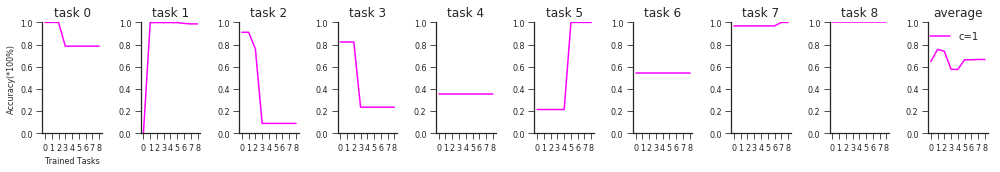

In [37]:
figure(figsize=(14, 2.5))
axs = [subplot(1,n_tasks+1,1)]#, None, None]
for i in range(1, n_tasks + 1):
    axs.append(subplot(1, n_tasks+1, i+1, sharex=axs[0], sharey=axs[0]))
    
keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        colorVal = scalarMap.to_rgba(np.log(cval))
        # axs[j].plot(evals[:, j], c=colorVal)
        axs[j].errorbar(range(n_tasks), mean_vals[:, j], yerr=std_vals[:, j]/np.sqrt(n_stats), c=colorVal)
        axs[j].set_xticks(range(0,n_tasks))
        axs[j].set_yticks([0,0.2,0.4,0.6,0.8,1])
        if j == 0:
            axs[j].set_xlabel('Trained Tasks') 
            axs[j].set_ylabel('Accuracy(*100%)') 
    label = "c=%g"%cval
    average = mean_vals.mean(1)  #Taking the average of cross validation accuracies accross all tasks after learning each task
    axs[-1].plot(average, c=colorVal, label=label)
    
for i, ax in enumerate(axs):
    ax.legend(loc='best')
    ax.set_title((['task %d'%j for j in range(n_tasks)] + ['average'])[i])
    
ylim(0,1)
gcf().tight_layout()
sns.despine()
plt.savefig('2taskprogressive-NSL-KDD.pdf')

In [38]:
for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
       print(mean_vals[:, j],std_vals[:, j]/np.sqrt(n_stats))

[1.         1.         1.         0.78571429 0.78571429 0.78571429
 0.78571429 0.78571429 0.78571429] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00503778 0.99832074 0.99832074 0.99832074 0.99832074 0.99832074
 0.99076406 0.98656591 0.98656591] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.91086957 0.91086957 0.76086957 0.08913043 0.08913043 0.08913043
 0.08913043 0.08913043 0.08913043] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.82352941 0.82352941 0.82352941 0.23529412 0.23529412 0.23529412
 0.23529412 0.23529412 0.23529412] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.35064935 0.35064935 0.35064935 0.35064935 0.35064935 0.35064935
 0.35064935 0.35064935 0.35064935] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.21446384 0.21446384 0.21446384 0.21446384 0.21446384 1.
 1.         1.         1.        ] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.96812166 0.96812166 0.96812166 0.96812166 0.96812166 0.96812166
 0.96812166 0.99980911 0

In [39]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


[1.0, 0.9991603694374476, 0.9197301013640956, 0.527114894254712, 0.49182178553363975, 0.5765181546113665, 0.571000971151396, 0.6240772196225344, 0.6658376540452096]


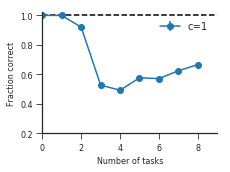

In [40]:
#Fractional Correctness = Average of cross validation accuracies of learned tasks only after training each task 
fig = plt.figure(figsize=(3.3,2.5))
ax = plt.subplot(111)

for cval in sorted_keys:
    mean_stuff = []
    std_stuff = []
    for i in range(len(data['mean'][cval])):
        mean_stuff.append(data['mean'][cval][i][:i+1].mean())
        std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))
    # plot(range(1,n_tasks+1), mean_stuff, 'o-', label="c=%g"%cval)
    errorbar(range(0,n_tasks), mean_stuff, yerr=std_stuff, fmt='o-', label="c=%g"%cval)
        
axhline(data['mean'][cval][0][0], linestyle='--', color='k')
xlabel('Number of tasks')
ylabel('Fraction correct')
legend(loc='best')
xlim(0, n_tasks)
ylim(0.2, 1.02)
# grid('on')
# sns.despine()
print(mean_stuff)
simple_axis(ax)
gcf().tight_layout()
plt.savefig('Normalcase_fractional_correct_NSLKDD.pdf')

In [41]:
import pandas as pd
from numpy.linalg import matrix_rank
import math
corr_matrix = []
corr_row = []
Rank_corr_matrix=[]
for j in range(n_tasks):
    df = pd.DataFrame(training_datasets[j][0])
    correlation_matrix = df.corr().values
    correlation_matrix = np.nan_to_num(correlation_matrix)
    for k in range(len(correlation_matrix)):
        for i in range(len(correlation_matrix)):
            corr_elem = (math.ceil(correlation_matrix[k][i]*1e10)/1e10)
            corr_row.append(np.around(corr_elem))
        corr_matrix.append(corr_row)
        corr_row = []
    rank_corr_matrix=np.linalg.matrix_rank(np.asarray(corr_matrix))
    Rank_corr_matrix.append(rank_corr_matrix)
    print('Rank of the Autocorrelation Matrix for task=',j,'is :',rank_corr_matrix)
    corr_matrix = []

Rank of the Autocorrelation Matrix for task= 0 is : 29
Rank of the Autocorrelation Matrix for task= 1 is : 18
Rank of the Autocorrelation Matrix for task= 2 is : 24
Rank of the Autocorrelation Matrix for task= 3 is : 21
Rank of the Autocorrelation Matrix for task= 4 is : 15
Rank of the Autocorrelation Matrix for task= 5 is : 22
Rank of the Autocorrelation Matrix for task= 6 is : 21
Rank of the Autocorrelation Matrix for task= 7 is : 16
Rank of the Autocorrelation Matrix for task= 8 is : 29


In [42]:
len(model_weights_save),len(save_weights_epoch)

(9, 90)

In [43]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    if i == 0:
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-2])))
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-1])))
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for i in range(len(Flatten_weights)):   
    Extract_model_params.append(Flatten_weights[i])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    if i == 2:
        pass
    else :
        temp=list(np.asarray(Extract_model_params[i])-np.asarray(Extract_model_params[i-1]))
        gradient = [j/0.001 for j in temp]
        gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
Rank_Hessian_matrix = []
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
    Rank_Hessian_matrix.append(rank_Hessian_matrix)
    print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)

Rank of the Hessian Matrix after task= 0 is : 510
Rank of the Hessian Matrix after task= 1 is : 2693
Rank of the Hessian Matrix after task= 2 is : 2942
Rank of the Hessian Matrix after task= 3 is : 3175
Rank of the Hessian Matrix after task= 4 is : 3238
Rank of the Hessian Matrix after task= 5 is : 3279
Rank of the Hessian Matrix after task= 6 is : 3330
Rank of the Hessian Matrix after task= 7 is : 3392
Rank of the Hessian Matrix after task= 8 is : 3472


In [44]:
#Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
#2. Manhattan Distance
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
#3.  Minkowski distance 
from decimal import Decimal
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
#4. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
#5. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
#6. Using Heuristic    
import difflib 

for i in [0,1,2,3,4,5,6,7]:
    print("Eucledian Parameter shift after task {0} :".format(i+1),euclidean_distance(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Cosine Parameter shift after task {0} :".format(i+1),cosine_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Jaccard Parameter shift after task {0} :".format(i+1),jaccard_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Heuristic Parameter shift after task {0} :".format(i+1),difflib.SequenceMatcher(None,Extract_model_params[i],Extract_model_params[i+1]).ratio())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


Eucledian Parameter shift after task 1 : 0.03723597654327982
Eucledian Parameter shift after task 2 : 0.0
Eucledian Parameter shift after task 3 : 2.2425232823171686
Eucledian Parameter shift after task 4 : 1.2511803115675713
Eucledian Parameter shift after task 5 : 1.0275412286612127
Eucledian Parameter shift after task 6 : 0.836811011983417
Eucledian Parameter shift after task 7 : 0.8247598133331262
Eucledian Parameter shift after task 8 : 0.49098704763945256
Cosine Parameter shift after task 1 : 1.0
Cosine Parameter shift after task 2 : 1.0
Cosine Parameter shift after task 3 : 0.943
Cosine Parameter shift after task 4 : 0.983
Cosine Parameter shift after task 5 : 0.989
Cosine Parameter shift after task 6 : 0.992
Cosine Parameter shift after task 7 : 0.993
Cosine Parameter shift after task 8 : 0.997
Jaccard Parameter shift after task 1 : 0.19658994032395566
Jaccard Parameter shift after task 2 : 1.0
Jaccard Parameter shift after task 3 : 0.13750600288138307
Jaccard Parameter shift a

In [45]:
#Counting the number of changed parameters
changed_model_parameters=[]
for i in range(1,len(Extract_model_params)):
    temp=[]
    for j,k in zip(Extract_model_params[i],Extract_model_params[i-1]):
        temp.append(abs(i-j))
    changed_model_parameters.append(temp)
print(len(changed_model_parameters))

import csv
#Save the model parameters in text file
with open('temp', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(Extract_model_params)

10


In [46]:
#Number of parameters unchanged within the thresold. Checked for five threshold values as [1e-5, 1e-4, 1e-3, 1e-2, 1e-1].
for i in range(len(changed_model_parameters)):
    print('-----After learning',i+2,'task-----')
    for j in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        print(j,'---->',sum(k < j for k in changed_model_parameters[i]))

-----After learning 2 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 3 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 4 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 5 task-----
1e-05 ----> 0
0.0001 ----> 0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """


0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 6 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 7 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 8 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 9 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 10 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 11 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
